In [15]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

def get_param(a, input_index, param_mode, rel_base):
    if param_mode == 1:
        return input_index
    elif param_mode == 2:
        return a[input_index] + rel_base 
    else:
        return a[input_index] if input_index < len(a) else 0

def get_digit(number, n):
    return number // 10**n % 10

def get_params(a, input_index, rel_base, out_idx):
    param_mode = [get_digit(a[input_index], i) for i in range(2, 5)]
    params = [get_param(a, input_index + i, param_mode[i-1], rel_base) for i in range(1,out_idx+1)]
    return params

def opcode_1(a, input_index, rel_base):
    param_1, param_2, param_3 = get_params(a, input_index, rel_base, 3);
    a[param_3] = a[param_1] + a[param_2]
    return input_index + 4

def opcode_2(a, input_index, rel_base):
    param_1, param_2, param_3 = get_params(a, input_index, rel_base, 3);
    a[param_3] = a[param_1] * a[param_2]
    return input_index + 4

def opcode_3(a, input_index, input_param, rel_base):
    param_1, = get_params(a, input_index, rel_base, 1);
    a[param_1] = input_param
    # print ('a[',param_1, ']=', input_param, ' index: ', input_index)
    return input_index + 2

def opcode_4(a, input_index, rel_base):
    param_1, _ = get_params(a, input_index, rel_base, 2);
    return input_index + 2, a[param_1]

def opcode_5(a, input_index, rel_base):
    param_1, param_2, _ = get_params(a, input_index, rel_base, 3);
    if a[param_1] > 0:
        return  a[param_2]
    return input_index + 3

def opcode_6(a, input_index, rel_base):
    param_1, param_2, _ = get_params(a, input_index, rel_base, 3);
    if a[param_1] == 0:
        return a[param_2]
    return input_index + 3

def opcode_7(a, input_index, rel_base):
    param_1, param_2, param_3 = get_params(a, input_index, rel_base, 3);
    a[param_3] = int(a[param_1] < a[param_2])
    return input_index + 4 

def opcode_8(a, input_index, rel_base):
    param_1, param_2, param_3 = get_params(a, input_index, rel_base, 3);
    a[param_3] = int(a[param_1] == a[param_2])
    return input_index + 4

def opcode_9(a, input_index, rel_base):
    param_1, _ = get_params(a, input_index, rel_base, 2);
    rel_modifier = param_1
    return input_index + 2, rel_modifier

opcodes = {1:opcode_1, 2: opcode_2, 3:opcode_3, 4:opcode_4, 5:opcode_5, 6: opcode_6, 7:opcode_7, 8:opcode_8, 9:opcode_9}

def intcode(a, a_input):
    input_index = 0
    rel_base = 0
    while a[input_index] != 99:
        opcode = a[input_index] % 100
        
        if opcode == 3:
            params_1 = a_input.pop(0)
            input_index = opcode_3(a, input_index, params_1, rel_base)
        elif opcode == 4:
            input_index, out_result = opcode_4(a, input_index, rel_base)
            yield out_result
        elif opcode == 9:
            input_index,rel_modifier = opcode_9(a, input_index, rel_base)
            rel_base += a[rel_modifier]
        else:
            input_index = opcodes[opcode](a, input_index, rel_base)
    yield 'Done'

def init_2d_list(rows, columns):
    return np.array([[0 for x in range(columns)] for y in range(rows)])

def read_input(filename):
    code = list(map(int, open(filename).read().split(",")))
    code.extend([0]*100000)
    return code

def paint_board(code, input_values):
    board = init_2d_list(200, 200)
    start = (100, 100)
    start_dir = (0, 1)
    cur_p = start
    cur_dir = start_dir
    paint_counter = {}
    computer = intcode(code, input_values)
    while True:
        out_color = next(computer)
        if out_color == 'Done': break
        board[cur_p] = out_color
        out_dir = next(computer)
        if out_dir == 'Done': break
        if out_dir == 0:
            cur_dir = (-cur_dir[1], cur_dir[0])
            cur_p = (cur_p[0] + cur_dir[0], cur_p[1] + cur_dir[1])
        elif out_dir == 1:
            cur_dir = (cur_dir[1], -cur_dir[0])
            cur_p = (cur_p[0] + cur_dir[0], cur_p[1] + cur_dir[1])
        input_values.append(board[cur_p])
        paint_counter[cur_p] = paint_counter.get(cur_p, 0) + 1
    return paint_counter, board

code = read_input('input.txt')
input_values = [0]
paint_counter, board = paint_board(code, input_values)
print ('Part 1 answer: ', len(paint_counter))

Part 1 answer:  2160


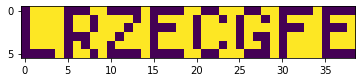

In [17]:
def bounding_box(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax

code = read_input('input.txt')
input_values = [1]
paint_counter, board = paint_board(code, input_values)

rmin, rmax, cmin, cmax = bounding_box(board)

image_array = board[rmin:rmax + 1, cmin:cmax + 1]
pixels = 255 * (1.0 - image_array)
im = Image.fromarray(pixels.astype(np.uint8), mode='L')
im = im.rotate(90, expand='True')
imshow(im)
